In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = load_img()

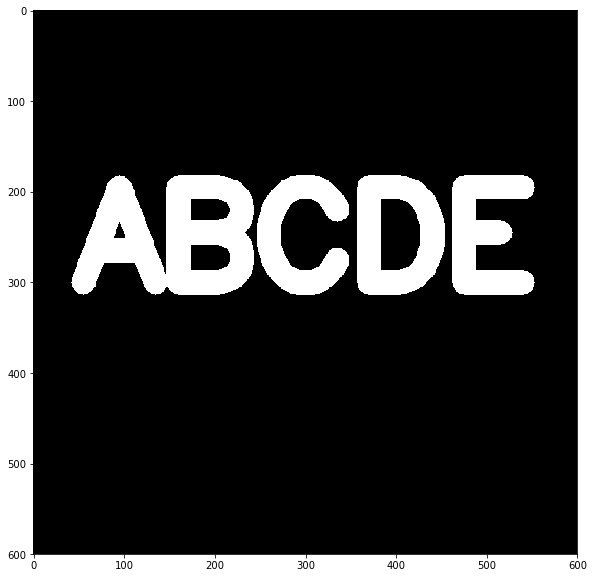

In [5]:
display_img(img)

# Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [17]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)

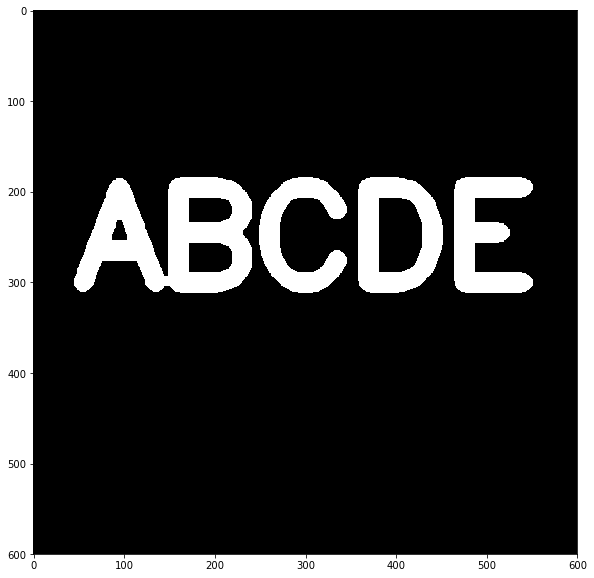

In [18]:
display_img(erosion1)

In [19]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

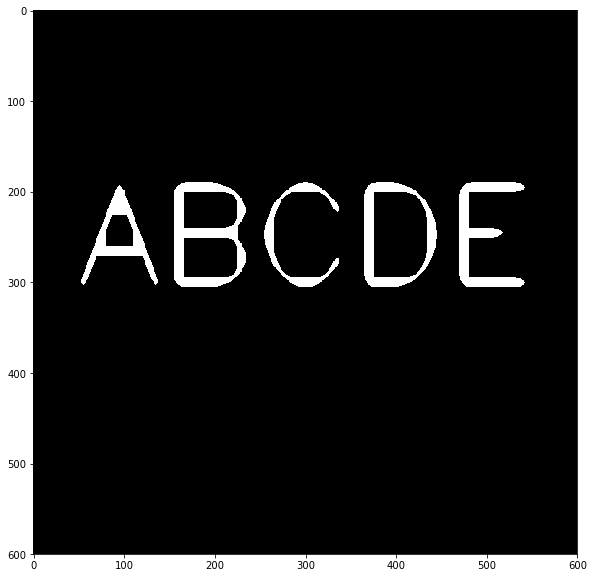

In [20]:
display_img(erosion5)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [91]:
img = load_img()

In [92]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

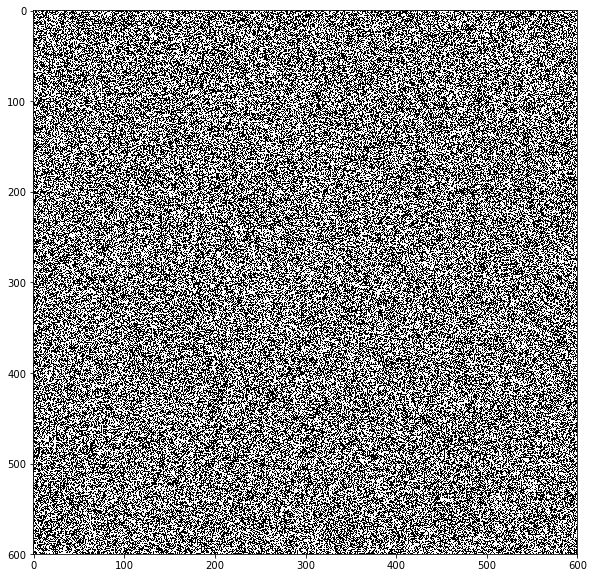

In [93]:
display_img(white_noise)

In [94]:
white_noise = white_noise*255

In [95]:
noise_img = white_noise+img

In [96]:
# # To make image binary
# noise_img[noise_img>255] = 255

In [97]:
np.max(noise_img), np.min(noise_img)

(510.0, 0.0)

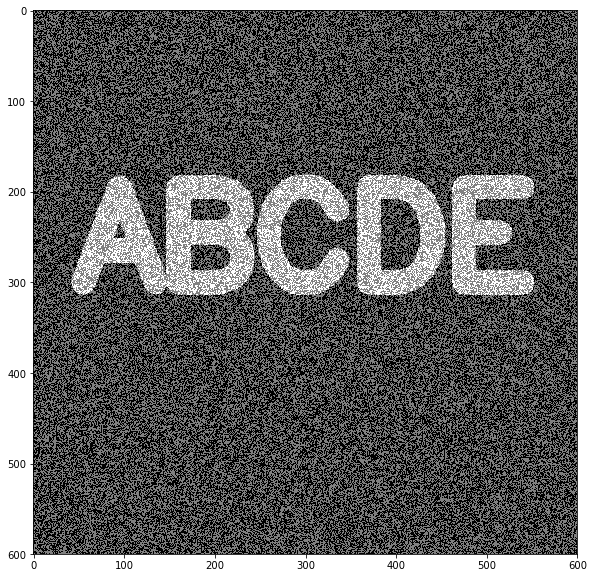

In [98]:
display_img(noise_img)

In [99]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

In [100]:
opening.min(), opening.max()

(0.0, 255.0)

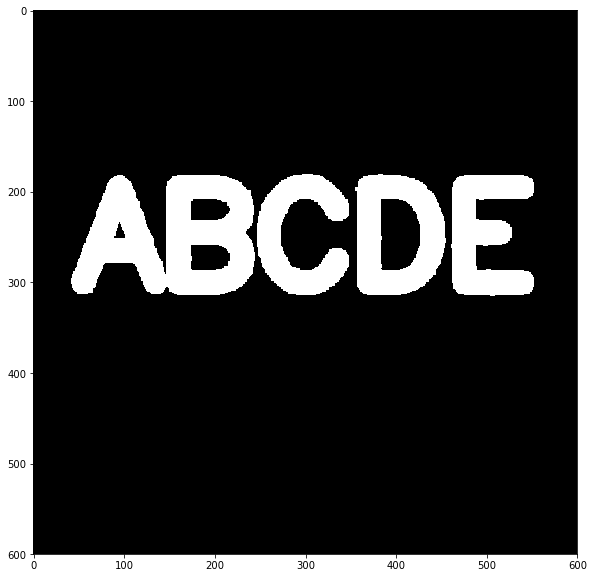

In [101]:
display_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [43]:
img = load_img()

In [44]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [45]:
black_noise

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1]])

In [46]:
black_noise= black_noise * -255

In [47]:
black_noise_img = img + black_noise

In [48]:
black_noise_img.min(), black_noise_img.max()

(-255.0, 255.0)

In [49]:
# Convert all -255 to make image binary again and avoid any color other than black or white.
black_noise_img[black_noise_img==-255] = 0

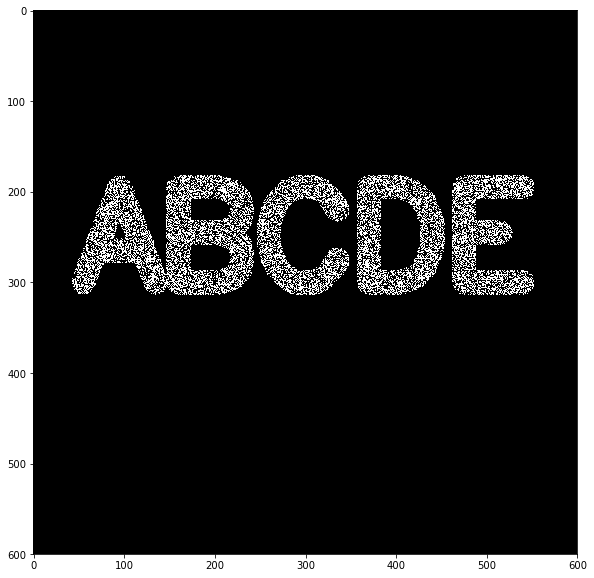

In [51]:
display_img(black_noise_img)

In [52]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

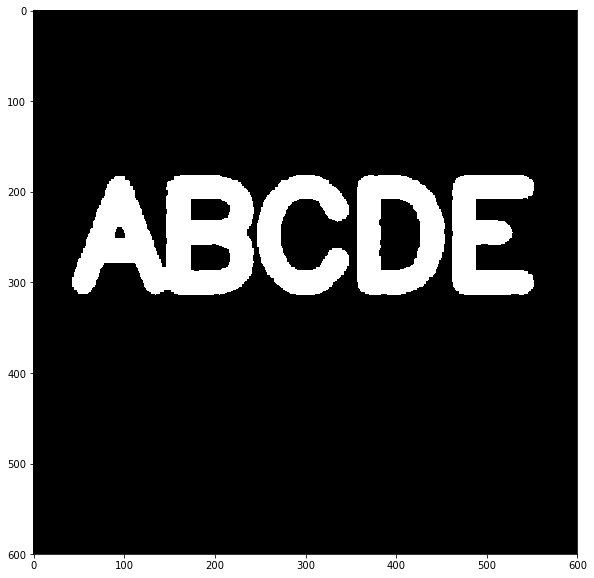

In [53]:
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [102]:
img = load_img()

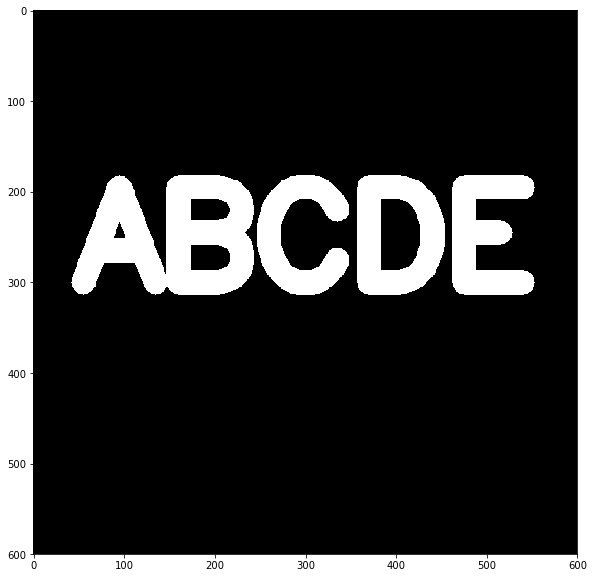

In [103]:
display_img(img)

In [104]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

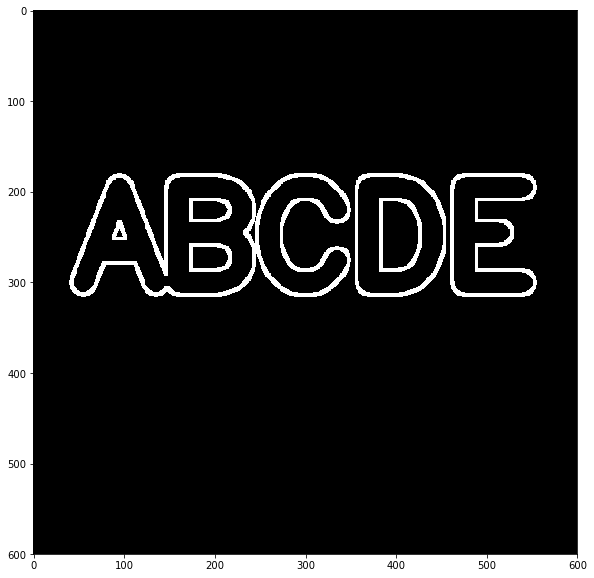

In [105]:
display_img(gradient)